<a href="https://colab.research.google.com/github/umesh03B/ma22c048_2023_PL/blob/main/Assignment/Assignment_14/Eigenfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

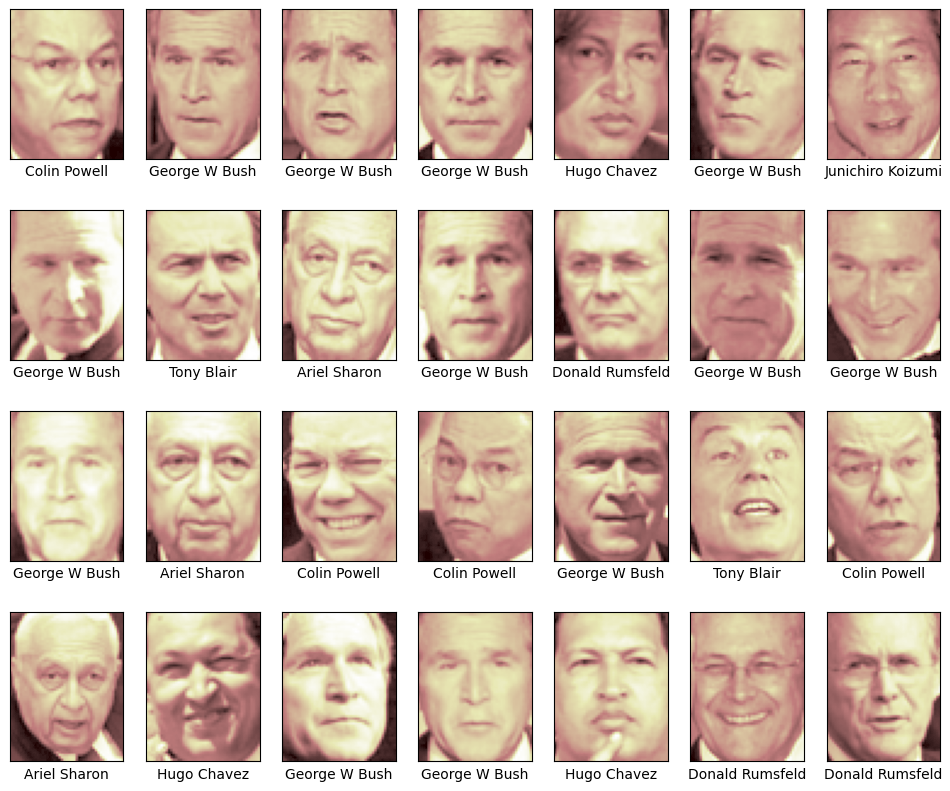

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import fetch_lfw_people # this will download images if
faces = fetch_lfw_people(min_faces_per_person=60) # you don't already have␣them
fig, ax = plt.subplots(4, 7, figsize=(12, 10))
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='pink')
  axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [2]:
faces['target'][:15]

array([1, 3, 3, 3, 5, 3, 6, 3, 7, 0, 3, 2, 3, 3, 3])

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Breast Cancer dataset
data = faces['data']

# # Extract features (X) and labels (y)
# X = data.data  # Features
# y = data.target  # Labels

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)
# X_test = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=1348)  # Specify the number of components you want
data_pca = pca.fit_transform(data)
# X_test_pca = pca.transform(X_test)


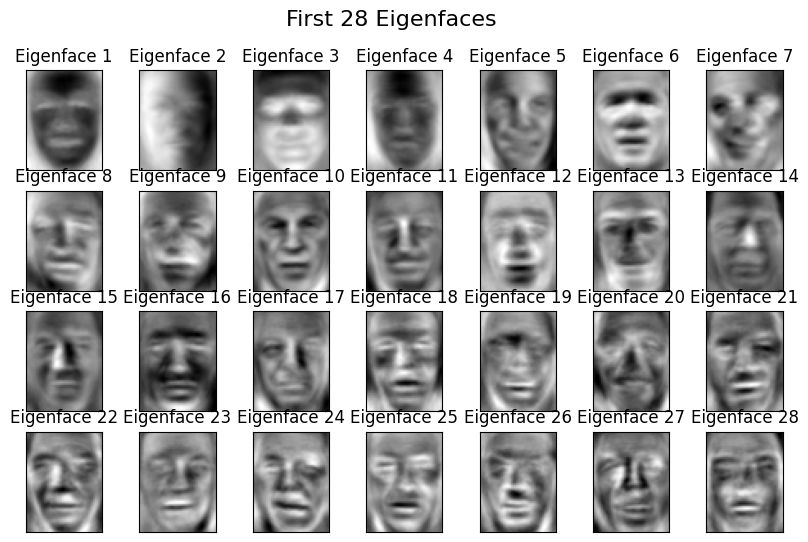

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Get the first 28 principal components (eigenfaces)
eigenfaces = pca.components_[:28]

# Create a grid to display the eigenfaces
fig, axes = plt.subplots(4, 7, figsize=(10, 6))
fig.suptitle('First 28 Eigenfaces', fontsize=16)

for i, ax in enumerate(axes.flat):
    eigenface = eigenfaces[i]
    eigenface_image = eigenface.reshape(62, 47)  # Assuming the eigenfaces are 64x64 pixels
    ax.imshow(eigenface_image, cmap='gray')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(f'Eigenface {i+1}')

plt.show()


In [5]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming X contains your dataset (each row is a data point, columns are features)

# Step 1: Compute the Frobenius norm of the original dataset
frobenius_norm_original = np.linalg.norm(data, 'fro')

total_variance = np.sum(pca.explained_variance_)


cumulative_variance = np.cumsum(pca.explained_variance_) / total_variance
N = np.argmax(cumulative_variance >= 0.95) + 1  # Add 1 to get the correct dimension


X_reduced = pca.transform(data)[:, :N]
frobenius_norm_reduced = np.linalg.norm(X_reduced, 'fro')

# Calculate the relative error
relative_error = (frobenius_norm_original - frobenius_norm_reduced) / frobenius_norm_original

print("Number of dimensions (N) for 95% variance:", N)
print("Relative error:", relative_error)


Number of dimensions (N) for 95% variance: 188
Relative error: 0.025226535


In [6]:
faces['target'].shape

(1348,)

In [7]:
faces['images'].shape

(1348, 62, 47)

In [8]:
faces['data'].shape

(1348, 2914)

In [9]:
data

array([[ 1.0272379 ,  0.9340561 ,  0.6617737 , ..., -1.4721478 ,
        -1.3923842 , -1.3200272 ],
       [-0.35446084, -0.8633693 , -0.7456226 , ...,  1.6856635 ,
         1.7056392 ,  1.733463  ],
       [-0.17265837,  0.17958118, -0.6101513 , ..., -0.09676456,
         1.1857214 ,  1.8019841 ],
       ...,
       [-1.2998337 , -1.4107335 , -1.6111338 , ...,  0.37026578,
         0.49392977,  0.4872278 ],
       [-0.8707798 , -0.84117883, -0.52736324, ...,  0.75588745,
         0.73884976,  0.6071404 ],
       [-1.2634732 , -1.4847015 , -1.5659766 , ..., -1.0693877 ,
        -0.8767631 , -0.37357375]], dtype=float32)

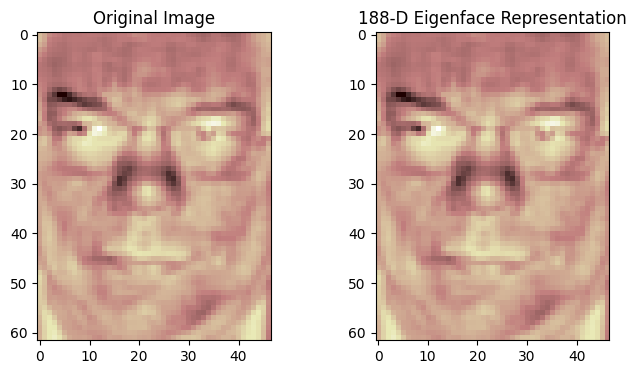

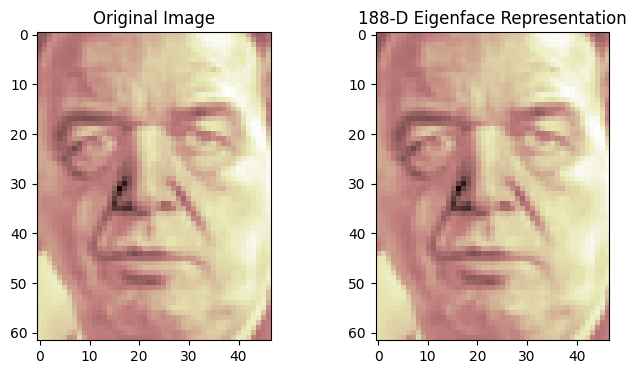

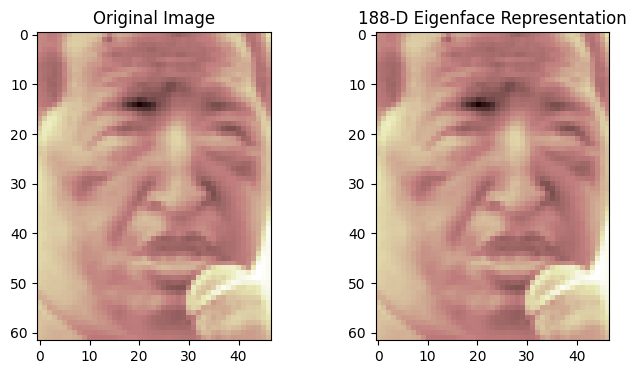

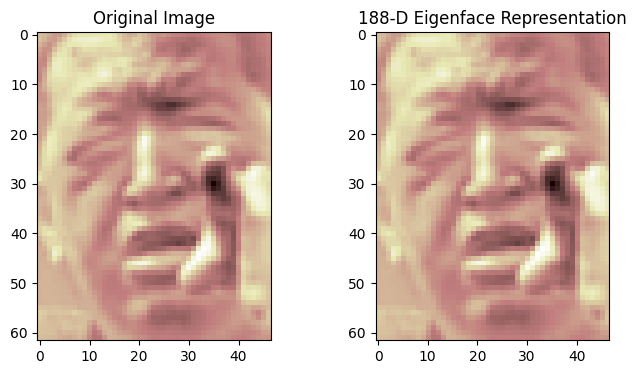

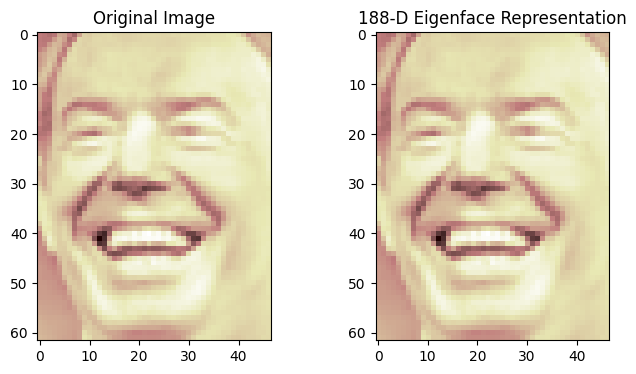

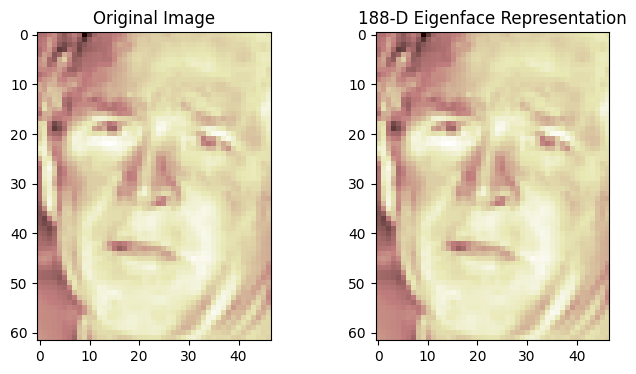

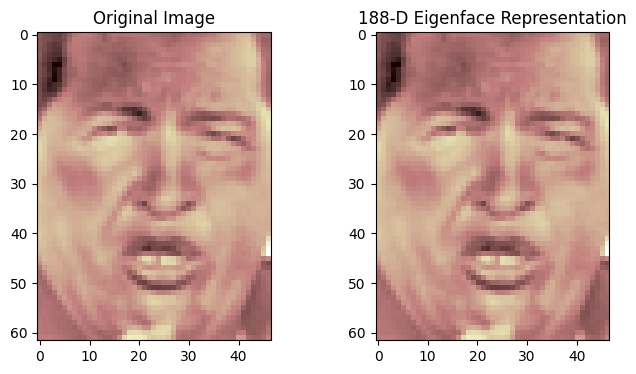

In [10]:
last_seven_images = data[-7:]

# Step 4: Transform the last seven images into the N-dimensional representation space
last_seven_images_transformed = pca.transform(last_seven_images)

# Step 5: Visualize and compare the original last seven images with their N-dimensional representations
for i in range(7):
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(last_seven_images[i].reshape(62,47), cmap='pink')

    plt.subplot(1, 2, 2)
    plt.title(f"{N}-D Eigenface Representation")
    plt.imshow(pca.inverse_transform(last_seven_images_transformed[i]).reshape(62,47), cmap='pink')

    plt.show()

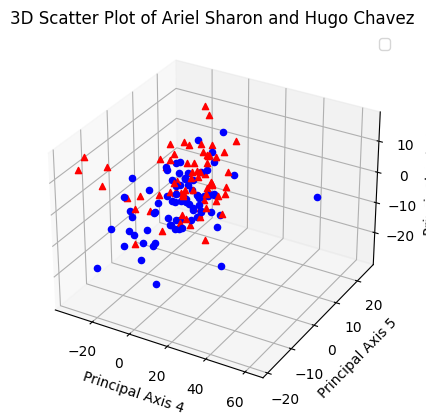

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X = faces['data']
y = faces['target']
pca = PCA(n_components=10).fit(X)
projdgt = pca.transform(X)

# Select the indices of images corresponding to Ariel Sharon and Hugo Chavez
ariel_sharon_indices = np.where(y == 0)[0]
hugo_chavez_indices = np.where(y == 5)[0]

# Combine the indices for both individuals
selected_indices = np.concatenate((ariel_sharon_indices, hugo_chavez_indices))

# Select the corresponding images and labels
selected_images = X[selected_indices]
selected_labels = y[selected_indices]

# # Number of dimensions N determined from Task 2 (choose N=6 to include axes 4, 5, and 6)
# N = 6

# # Step 3: Perform PCA with N components
# pca = PCA(n_components=N)
# pca.fit(selected_images)

# # Step 4: Transform the selected images into the three-dimensional representation
# selected_images_transformed = pca.transform(selected_images)

# # Step 5: Plot the points in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points from Ariel Sharon in blue
for i in ariel_sharon_indices:
  ax.scatter(data_pca[i, 3],
           data_pca[i, 4],
           data_pca[i, 5],
           c='b', marker='o')

# # Plot points from Hugo Chavez in red
for i in  hugo_chavez_indices:
  ax.scatter(data_pca[i, 3],
           data_pca[i, 4],
           data_pca[i, 5],
           c='r', marker='^')

ax.set_xlabel('Principal Axis 4')
ax.set_ylabel('Principal Axis 5')
ax.set_zlabel('Principal Axis 6')

plt.legend(loc='best')
plt.title("3D Scatter Plot of Ariel Sharon and Hugo Chavez")
plt.show()
